In [12]:
library(tidyr)
library(dplyr)
library(readr)
library(basetheme)
library(phangorn)
library(ape)
library(ade4)
library(ggtree)
library(colorspace)
library(adegenet)
library(dendextend)
library(circlize)
library(ggplot2)

In [13]:
sgdp_cnv = read.csv('../data/cnvator_data_sudmant_overlapped.csv')
anotation = read.csv("../data/SGDP_anotation.csv")
sgdp_cnv

Sample_ID,Chr,Start_original,End_original,Start,End,SIZE,SCORE,RD,LENGHT,P.VALUE,GAUSSIAN
<chr>,<chr>,<int>,<int>,<int>,<int>,<dbl>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>
LP6005441-DNA_A01,1,231001,237900,228416,267160,3,duplication,2.08923000,6900,0.00000e+00,5.21580e-35
LP6005441-DNA_A01,1,471201,551200,471226,471326,1,deletion,0.18775800,80000,1.99216e-12,2.21593e+09
LP6005441-DNA_A01,1,723801,728100,712534,763301,3,duplication,1.59450000,4300,1.12007e-02,1.74282e+09
LP6005441-DNA_A01,1,1010901,1014200,1009660,1015541,1,deletion,0.49824900,3300,5.43459e-04,2.19695e+09
LP6005441-DNA_A01,1,4124201,4127700,4120597,4131559,1,deletion,0.50557100,3500,4.55350e-11,2.21779e-35
LP6005441-DNA_A01,1,13472301,13657600,13512627,13526732,1,deletion,0.37020900,185300,8.60078e-13,2.42591e+02
LP6005441-DNA_A01,1,13472301,13657600,13503895,13504199,1,deletion,0.37020900,185300,8.60078e-13,2.42591e+02
LP6005441-DNA_A01,1,13472301,13657600,13504199,13508240,1,deletion,0.37020900,185300,8.60078e-13,2.42591e+02
LP6005441-DNA_A01,1,13698701,13773800,13725296,13733660,1,deletion,0.49806100,75100,2.12214e-12,1.14811e-26


In [14]:
anotation = anotation[order(anotation$X3.Illumina_ID),]
colnames(anotation)[2] ="id"
colnames(anotation)[9] ="Region"
colnames(anotation)[7] ="Population"
anotation_2 = as.data.frame(anotation[,c(2,7,9)])
rownames(anotation_2) <- anotation_2$id
anotation_2$id <- NULL
anotation_2

,Population,Region
,<chr>,<chr>
LP6005441-DNA_A01,Adygei,WestEurasia
LP6005441-DNA_A03,Bougainville,Oceania
LP6005441-DNA_A04,Piapoco,America
LP6005441-DNA_A05,French,WestEurasia
LP6005441-DNA_A06,Bergamo,WestEurasia
LP6005441-DNA_A08,Mbuti,Africa
LP6005441-DNA_A09,Naxi,EastAsia
LP6005441-DNA_A10,Papuan,Oceania
LP6005441-DNA_A11,Ju_hoan_North,Africa


In [15]:
sgdp_cnv <- sgdp_cnv[c(1, 2, 5, 6,8, 9)]
#iris[c(1, 51, 101, 2, 52, 102), ]
deletions = filter(sgdp_cnv, SCORE == 'deletion')
duplications = filter(sgdp_cnv, SCORE == 'duplication')

drop <- c('SCORE')
sgdp_cnv = sgdp_cnv[,!(names(sgdp_cnv) %in% drop)]
deletions = deletions[,!(names(deletions) %in% drop)]
duplications = duplications[,!(names(duplications) %in% drop)]

#duplications[is.na(duplications)] <- 2"

In [16]:
df = pivot_wider(deletions, names_from = Sample_ID, values_from = RD, values_fn = list(RD = mean),
     values_fill = list(RD = 2),)
drop <- c("Chr","Start", "End")
df = df[,!(names(df) %in% drop)]
df = t(df)
df = as.data.frame(df)
df

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,⋯,V7185,V7186,V7187,V7188,V7189,V7190,V7191,V7192,V7193,V7194
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
LP6005441-DNA_A01,1.87758e-01,0.498249,0.5055710,0.370209,0.370209,0.370209,0.498061,0.5033680,0.455238,0.47683600,⋯,2,2,2,2,2,2,2,2,2,2
LP6005441-DNA_A03,2.36888e-02,2.000000,2.0000000,0.245590,2.000000,0.245590,0.486351,0.4684570,0.524212,2.00000000,⋯,2,2,2,2,2,2,2,2,2,2
LP6005441-DNA_A04,8.94479e-02,0.451920,0.4343250,0.345271,0.345271,0.345271,0.583861,0.5966485,2.000000,2.00000000,⋯,2,2,2,2,2,2,2,2,2,2
LP6005441-DNA_A05,1.35674e-04,0.226983,2.0000000,0.348731,0.348731,0.348731,0.541334,0.5882280,0.521945,0.51525900,⋯,2,2,2,2,2,2,2,2,2,2
LP6005441-DNA_A06,2.11565e-03,0.358707,0.0555952,0.349037,0.349037,0.349037,0.516116,0.5160520,2.000000,0.51718200,⋯,2,2,2,2,2,2,2,2,2,2
LP6005441-DNA_A08,1.99001e-03,0.206298,2.0000000,0.331427,0.331427,0.331427,0.467643,0.4293815,0.438220,2.00000000,⋯,2,2,2,2,2,2,2,2,2,2
LP6005441-DNA_A09,3.14463e-01,0.280867,0.1301550,0.386081,0.386081,0.386081,0.478766,2.0000000,0.532972,2.00000000,⋯,2,2,2,2,2,2,2,2,2,2
LP6005441-DNA_A10,1.52128e-01,0.173932,2.0000000,0.240744,0.240744,0.240744,0.527306,0.4842005,0.527738,2.00000000,⋯,2,2,2,2,2,2,2,2,2,2
LP6005441-DNA_A11,5.76855e-03,0.272102,2.0000000,0.331100,0.331100,0.331100,0.486354,0.4710155,2.000000,0.50264400,⋯,2,2,2,2,2,2,2,2,2,2


In [17]:
df1 = merge(anotation_2, df, by=0, all=TRUE)
df1[, 'Region'] <- as.factor(df1[, 'Region'])
df1[, 'Population'] <- as.factor(df1[,'Population'])
df2 = na.omit(df1)
row.names(df2) <- df2$Row.names
regions = df2[,c(1,2,3)]
df2[1] <- NULL

df1 = df2[,-1]
regions

,Row.names,Population,Region
,<I<chr>>,<fct>,<fct>
LP6005441-DNA_A01,LP6005441-DNA_A01,Adygei,WestEurasia
LP6005441-DNA_A03,LP6005441-DNA_A03,Bougainville,Oceania
LP6005441-DNA_A04,LP6005441-DNA_A04,Piapoco,America
LP6005441-DNA_A05,LP6005441-DNA_A05,French,WestEurasia
LP6005441-DNA_A06,LP6005441-DNA_A06,Bergamo,WestEurasia
LP6005441-DNA_A08,LP6005441-DNA_A08,Mbuti,Africa
LP6005441-DNA_A09,LP6005441-DNA_A09,Naxi,EastAsia
LP6005441-DNA_A10,LP6005441-DNA_A10,Papuan,Oceania
LP6005441-DNA_A11,LP6005441-DNA_A11,Ju_hoan_North,Africa


In [18]:
D = dist(df1, method= "manhattan")

Warning message in dist(df1, method = "manhattan"):
“NAs introduced by coercion”


In [19]:
hclust(d = D, method = "ward.D")


Call:
hclust(d = D, method = "ward.D")

Cluster method   : ward.D 
Distance         : manhattan 
Number of objects: 276 


In [20]:
tre <- hclust(D, method="ward.D")
tre


Call:
hclust(d = D, method = "ward.D")

Cluster method   : ward.D 
Distance         : manhattan 
Number of objects: 276 


In [21]:
tre <- hclust(dist(df1, method="manhattan") , method= "ward.D")
tre

Warning message in dist(df1, method = "manhattan"):
“NAs introduced by coercion”



Call:
hclust(d = dist(df1, method = "manhattan"), method = "ward.D")

Cluster method   : ward.D 
Distance         : manhattan 
Number of objects: 276 


In [22]:
dend <- as.dendrogram(hclust(dist(df1),  method="ward.D"))

Warning message in dist(df1):
“NAs introduced by coercion”


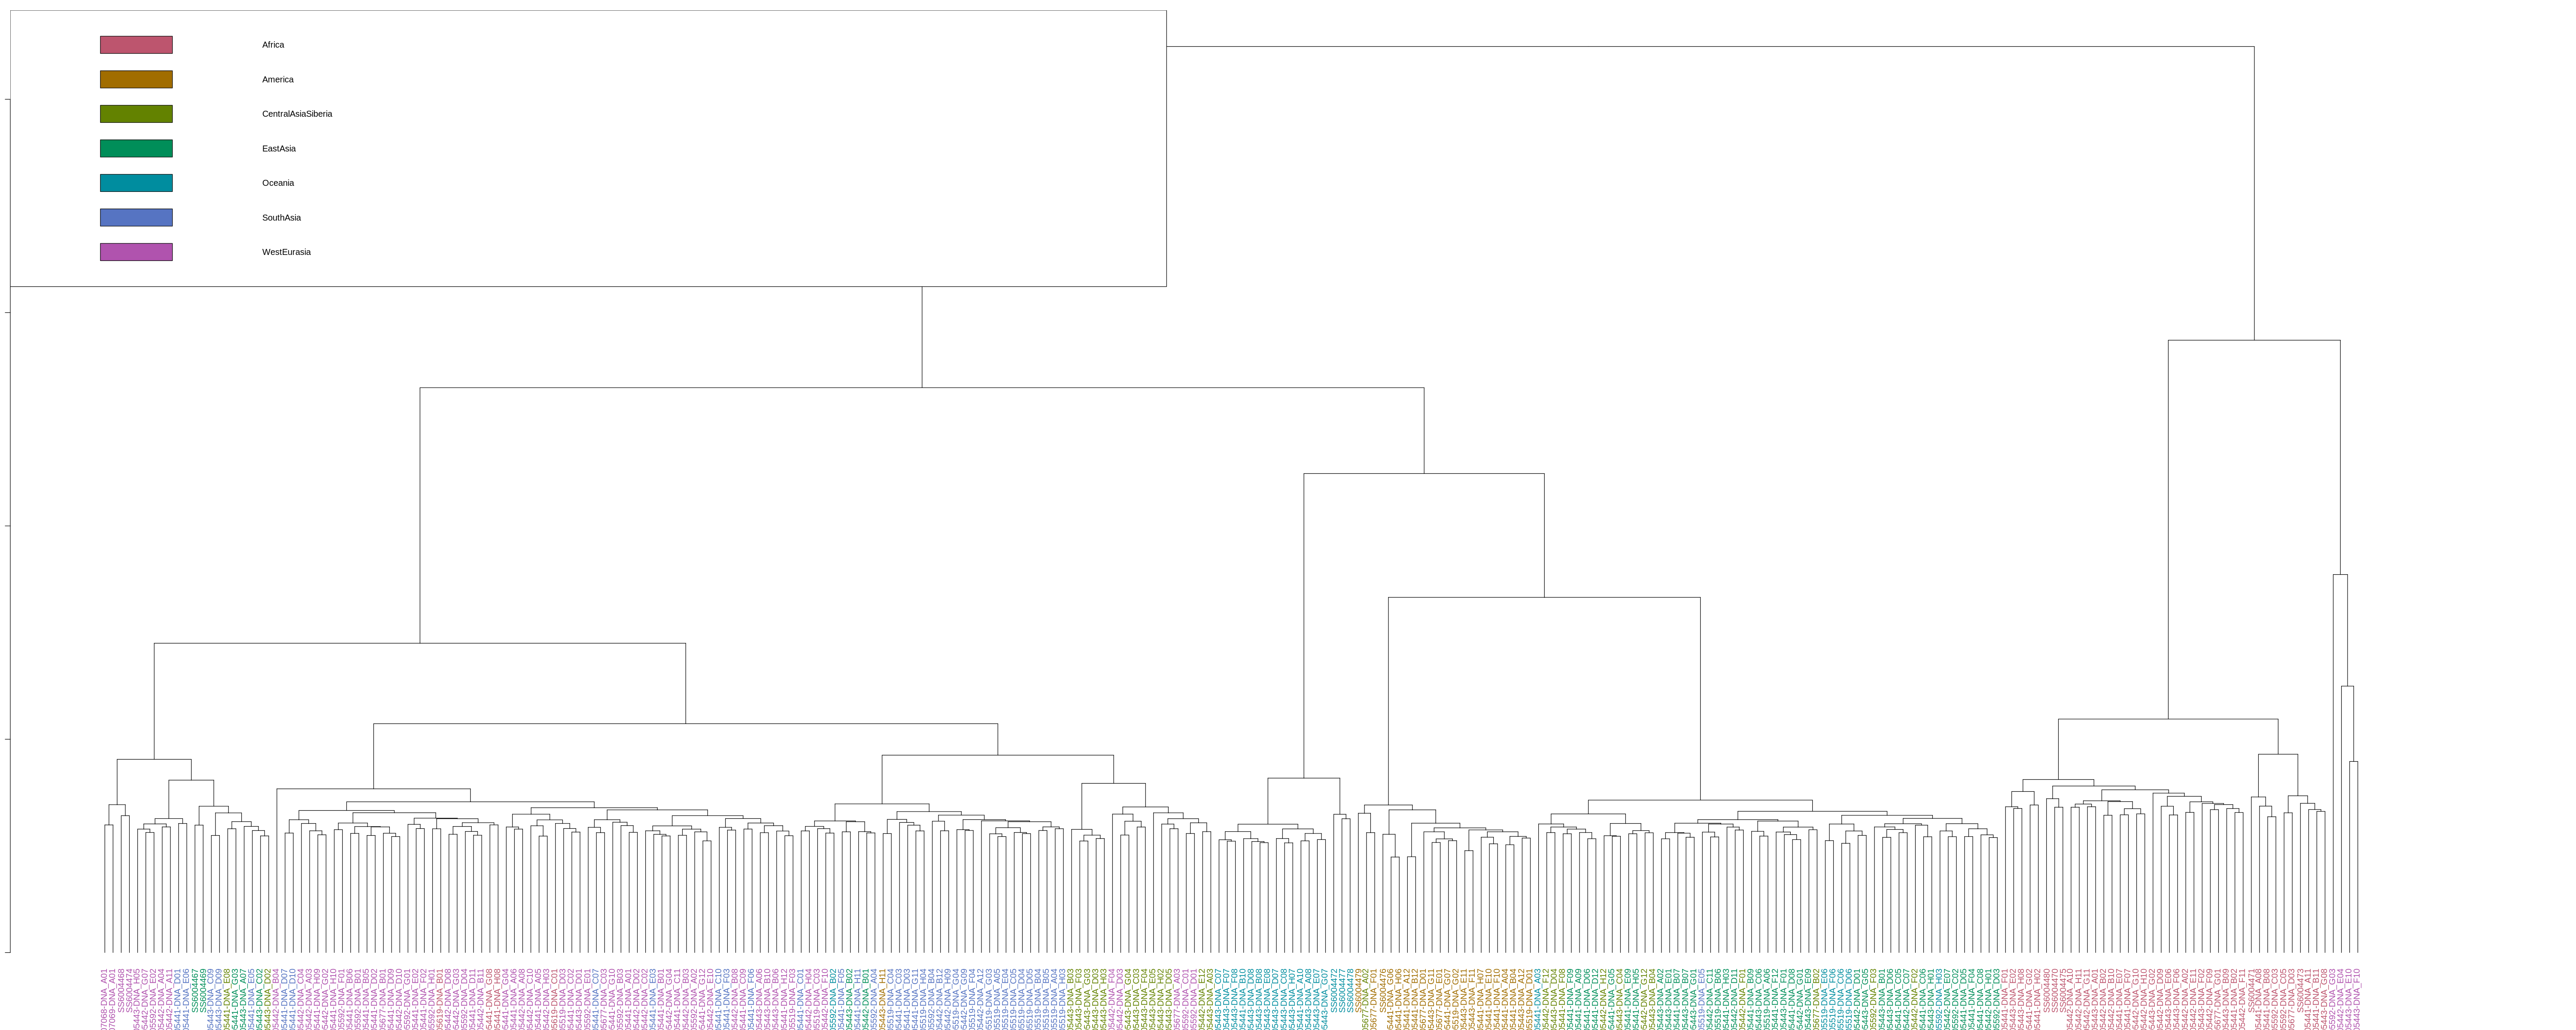

In [23]:
# Create a vector giving a color for each invidiual to which region it belongs to
# Change height/width to rescale your figure
options(repr.plot.width=50, repr.plot.height=20) ; par(oma=c(0,0,0,0))
type <- regions$Region
n_types <- length(unique(type))
cols_7 <- colorspace::rainbow_hcl(n_types, c = 70, l  = 50)
col_type <- cols_7[type]
# color labels by region
labels_colors(dend) <- col_type[order.dendrogram(dend)]
# color branches based on cutting the tree into 4 clusters:\n",
#dend <- color_branches(dend, k = 10)\n",
par(mar = c(4,1,1,12))
plot(dend)
#colored_bars(cbind(k234[,3:1], col_car_type), dend, rowLabels = c(paste0(\"k = \", 4:2), \"Car Type\"), horiz = TRUE)\n",
legend("topleft", legend = levels(type), fill = cols_7)

In [24]:
dend <- as.dendrogram(hclust(D,  method="ward.D"))
dend

'dendrogram' with 2 branches and 276 members total, at height 9209.673 

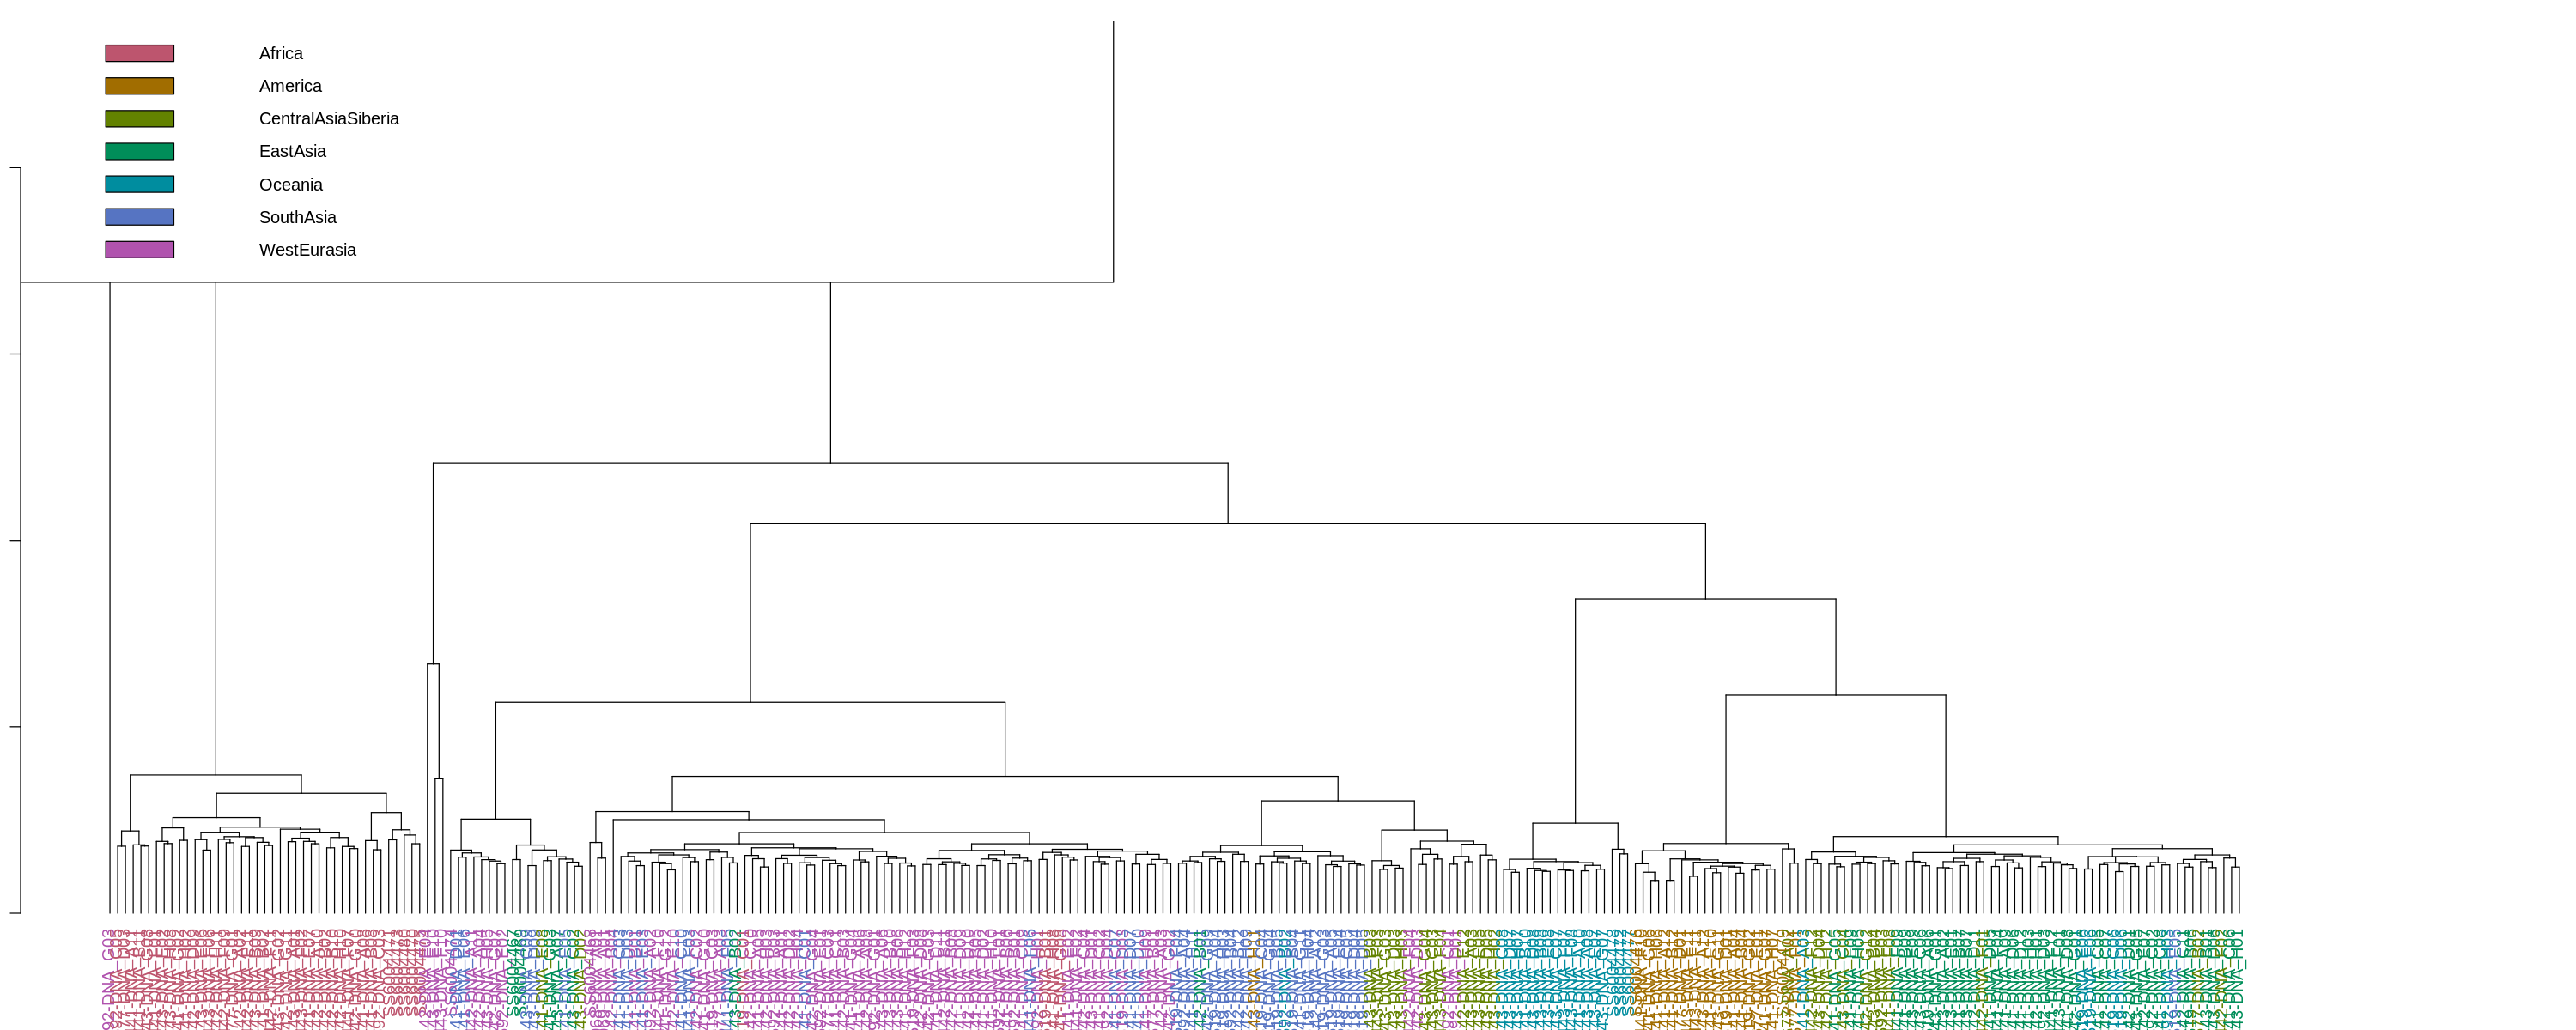

In [25]:
options(repr.plot.width=25, repr.plot.height=10) ; par(oma=c(0,0,0,0))
car_type <- regions$Region
n_car_types <- length(unique(car_type))
cols_7 <- colorspace::rainbow_hcl(n_car_types, c = 70, l  = 50)
col_car_type <- cols_7[car_type]
# color labels by car company
labels_colors(dend) <- col_car_type[order.dendrogram(dend)]
# color branches based on cutting the tree into 4 clusters:
#dend <- color_branches(dend, k = 10)\n",
par(mar = c(4,1,1,12))
plot(dend)
#colored_bars(cbind(k234[,3:1], col_car_type), dend, rowLabels = c(paste0(\"k = \", 4:2), \"Car Type\"), horiz = TRUE)\n",
legend("topleft", legend = levels(car_type), fill = cols_7)

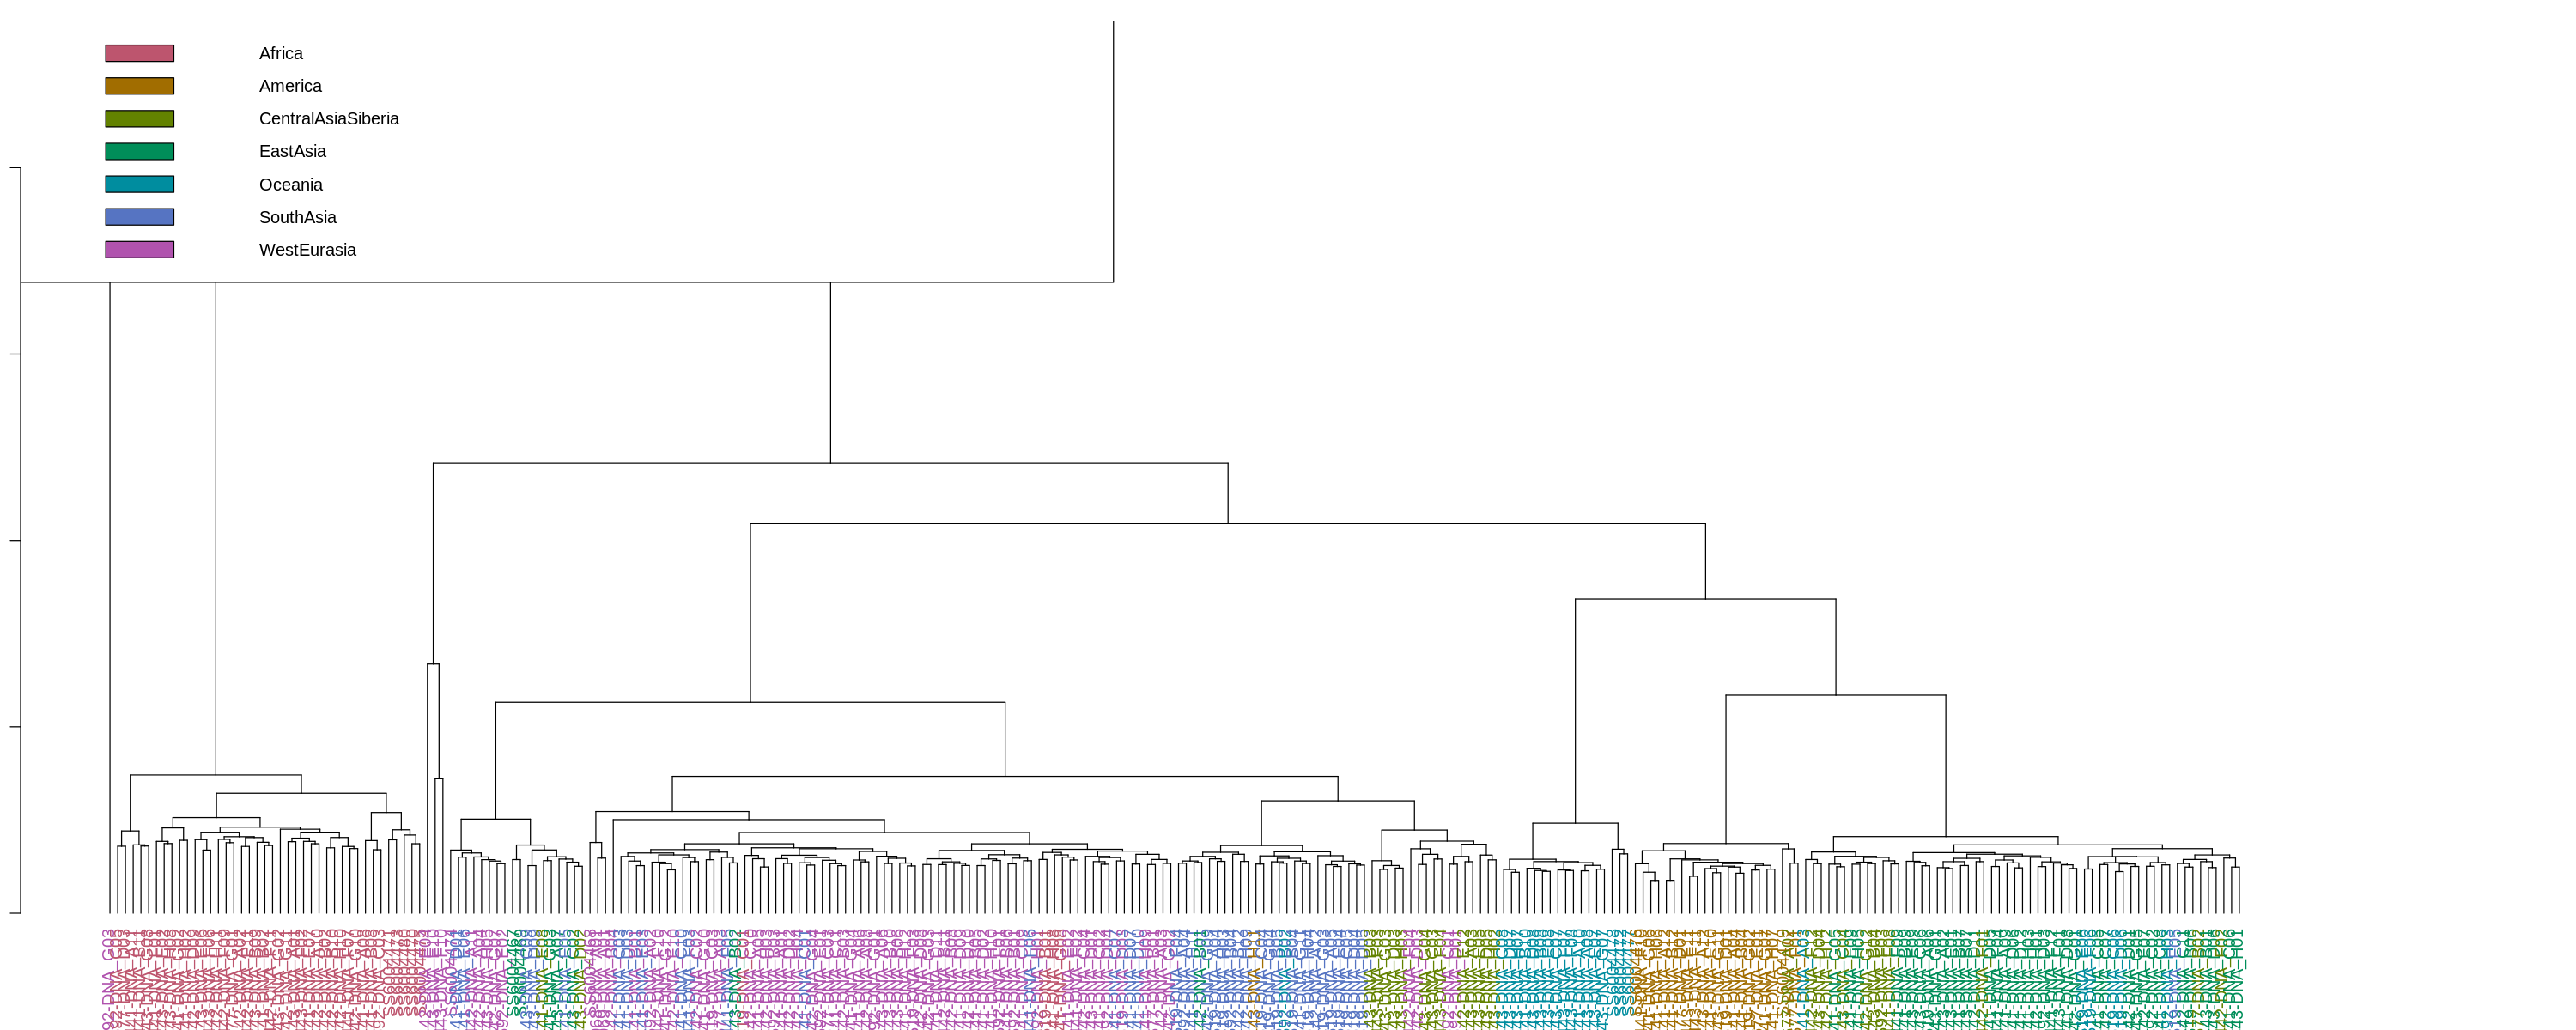

In [26]:
options(repr.plot.width=25, repr.plot.height=10) ; par(oma=c(0,0,0,0))
car_type <- regions$Region
n_car_types <- length(unique(car_type))
cols_7 <- colorspace::rainbow_hcl(n_car_types, c = 70, l  = 50)
col_car_type <- cols_7[car_type]
# color labels by car company
labels_colors(dend) <- col_car_type[order.dendrogram(dend)]
# color branches based on cutting the tree into 4 clusters:
#dend <- color_branches(dend, k = 10)\n",
par(mar = c(4,1,1,12))
plot(dend)
#colored_bars(cbind(k234[,3:1], col_car_type), dend, rowLabels = c(paste0(\"k = \", 4:2), \"Car Type\"), horiz = TRUE)\n",
legend("topleft", legend = levels(car_type), fill = cols_7)

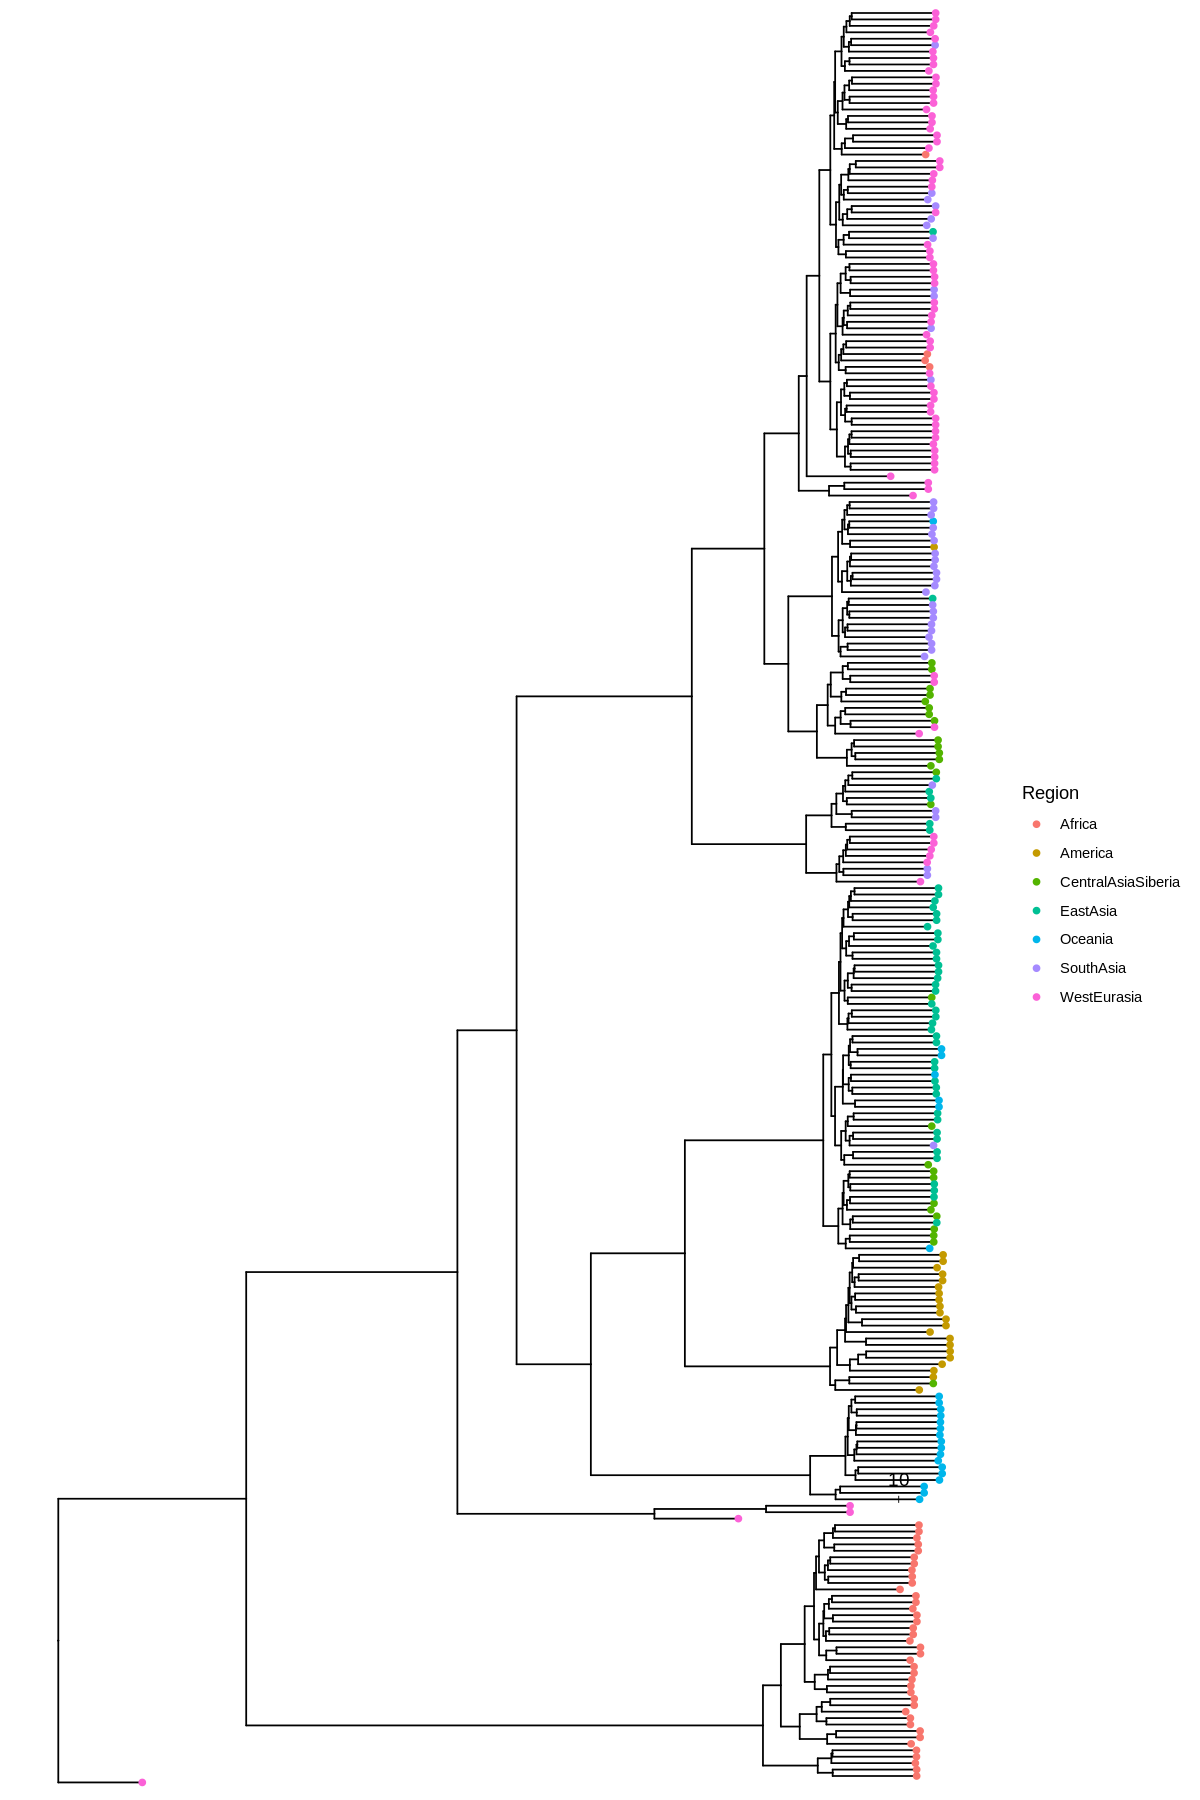

In [27]:
options(repr.plot.width=10, repr.plot.height=15) ; par(oma=c(0,0,0,0))
p1 <- ggtree(tre) %<+% regions + #geom_tiplab(color=Population) +
geom_tippoint(aes(color=Region)) + 
geom_treescale(x=0, y=45, fontsize=4, linesize=2, offset=2, width=10)
plot(p1)

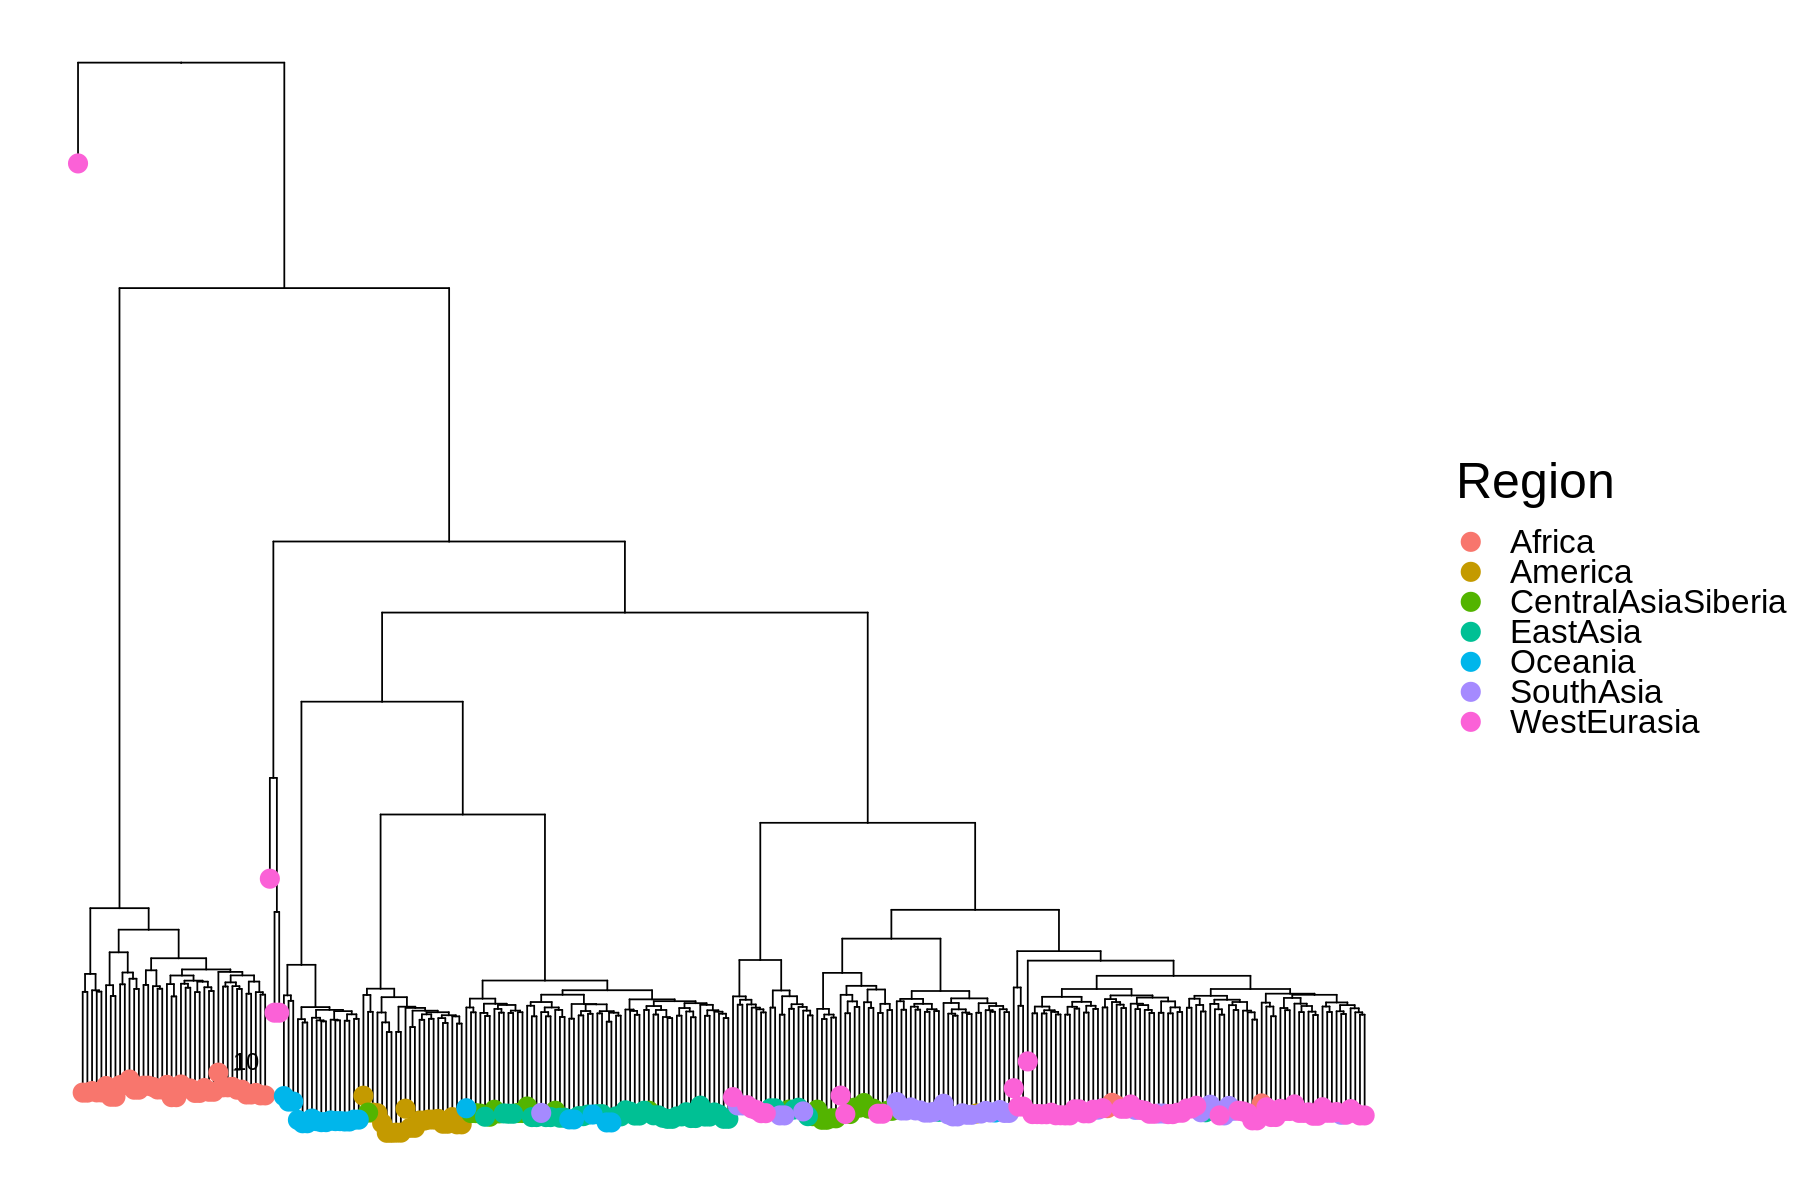

In [28]:
options(repr.plot.width=15, repr.plot.height=10) ; par(oma=c(0,0,0,0))
p1 <- ggtree(tre, layout="dendrogram") %<+% regions +  
geom_tippoint(aes(color=Region),  size=5) + # Colour code the tips with country\
# Adding in a scale
geom_treescale(x=0, y=35, fontsize=5, linesize=2, offset=2, width=10) +
theme(legend.title = element_text(size = 30), 
      legend.text = element_text(size = 20))
plot(p1)
#ggsave("../plots/ward_phylo_horiz.png", width = 25, height = 10)"

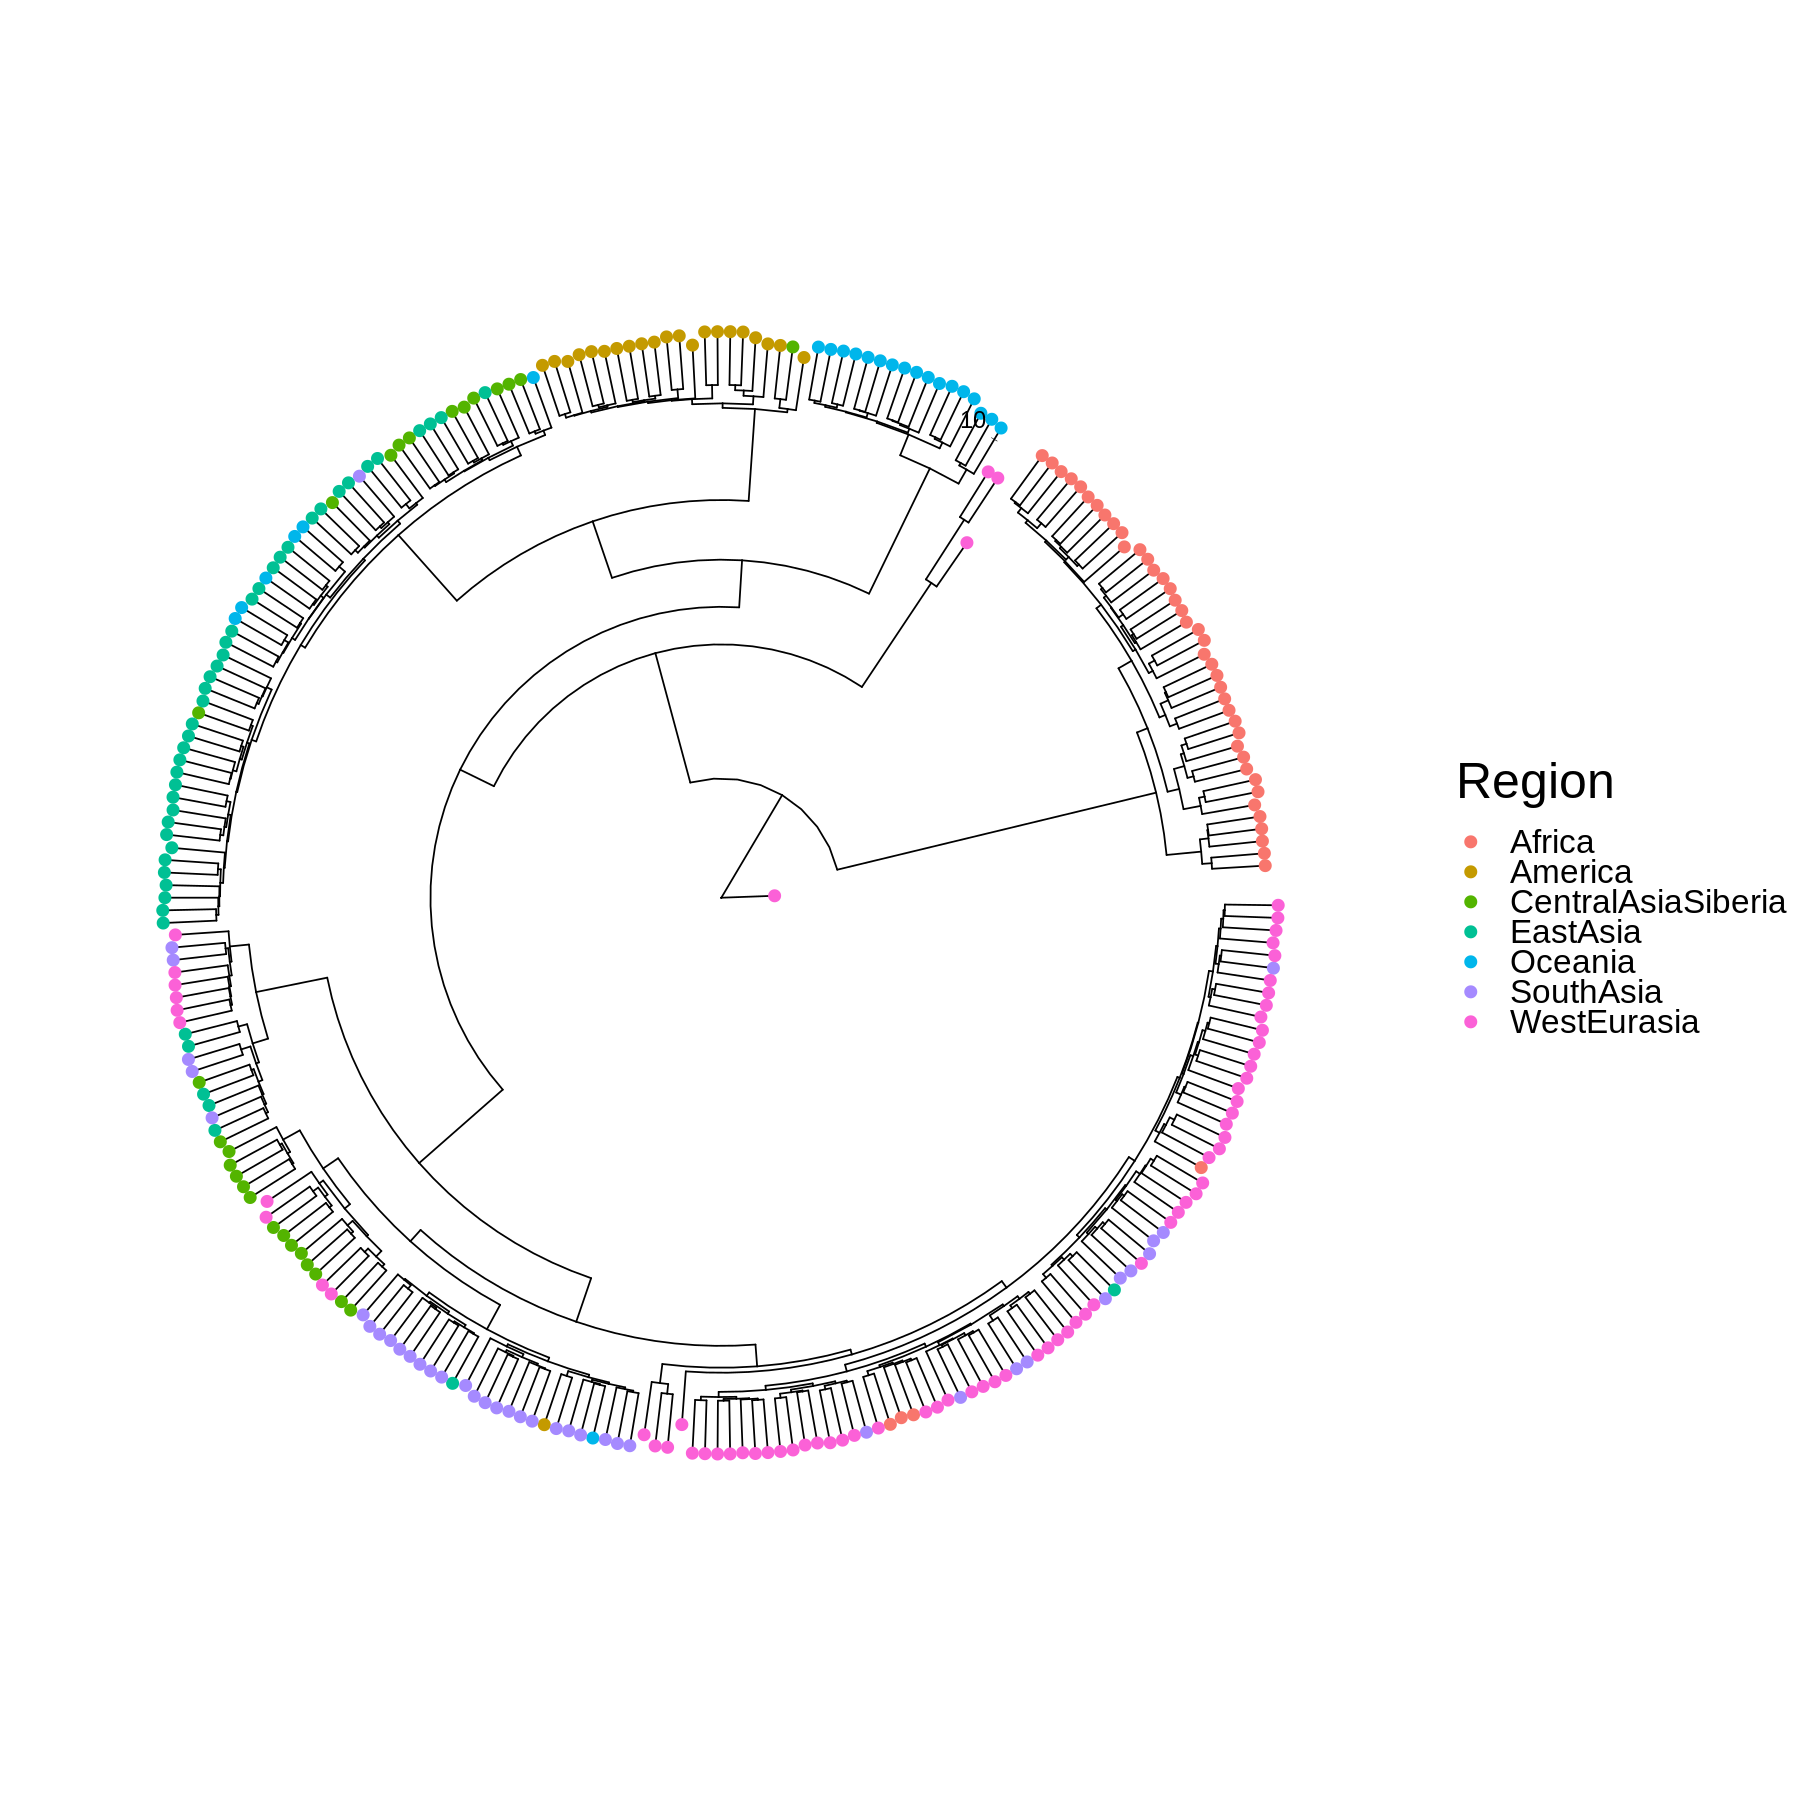

In [29]:
options(repr.plot.width=15, repr.plot.height=15) ; par(oma=c(0,0,0,0))
p1 <- ggtree(tre, layout="circular") %<+% regions + #geom_tiplab() +
geom_tippoint(aes(color=Region), size=3) + # Colour code the tips with country\n",
# Adding in a scale
geom_treescale(x=0, y=45, fontsize=5, linesize=2, offset=2, width=10)+
theme(legend.title = element_text(size = 30), 
      legend.text = element_text(size = 20))


plot(p1)
ggsave("../plots/ward_phylo_circular.png", width = 25, height = 10)

Warning message in dist(df1, method = "manhattan"):
“NAs introduced by coercion”


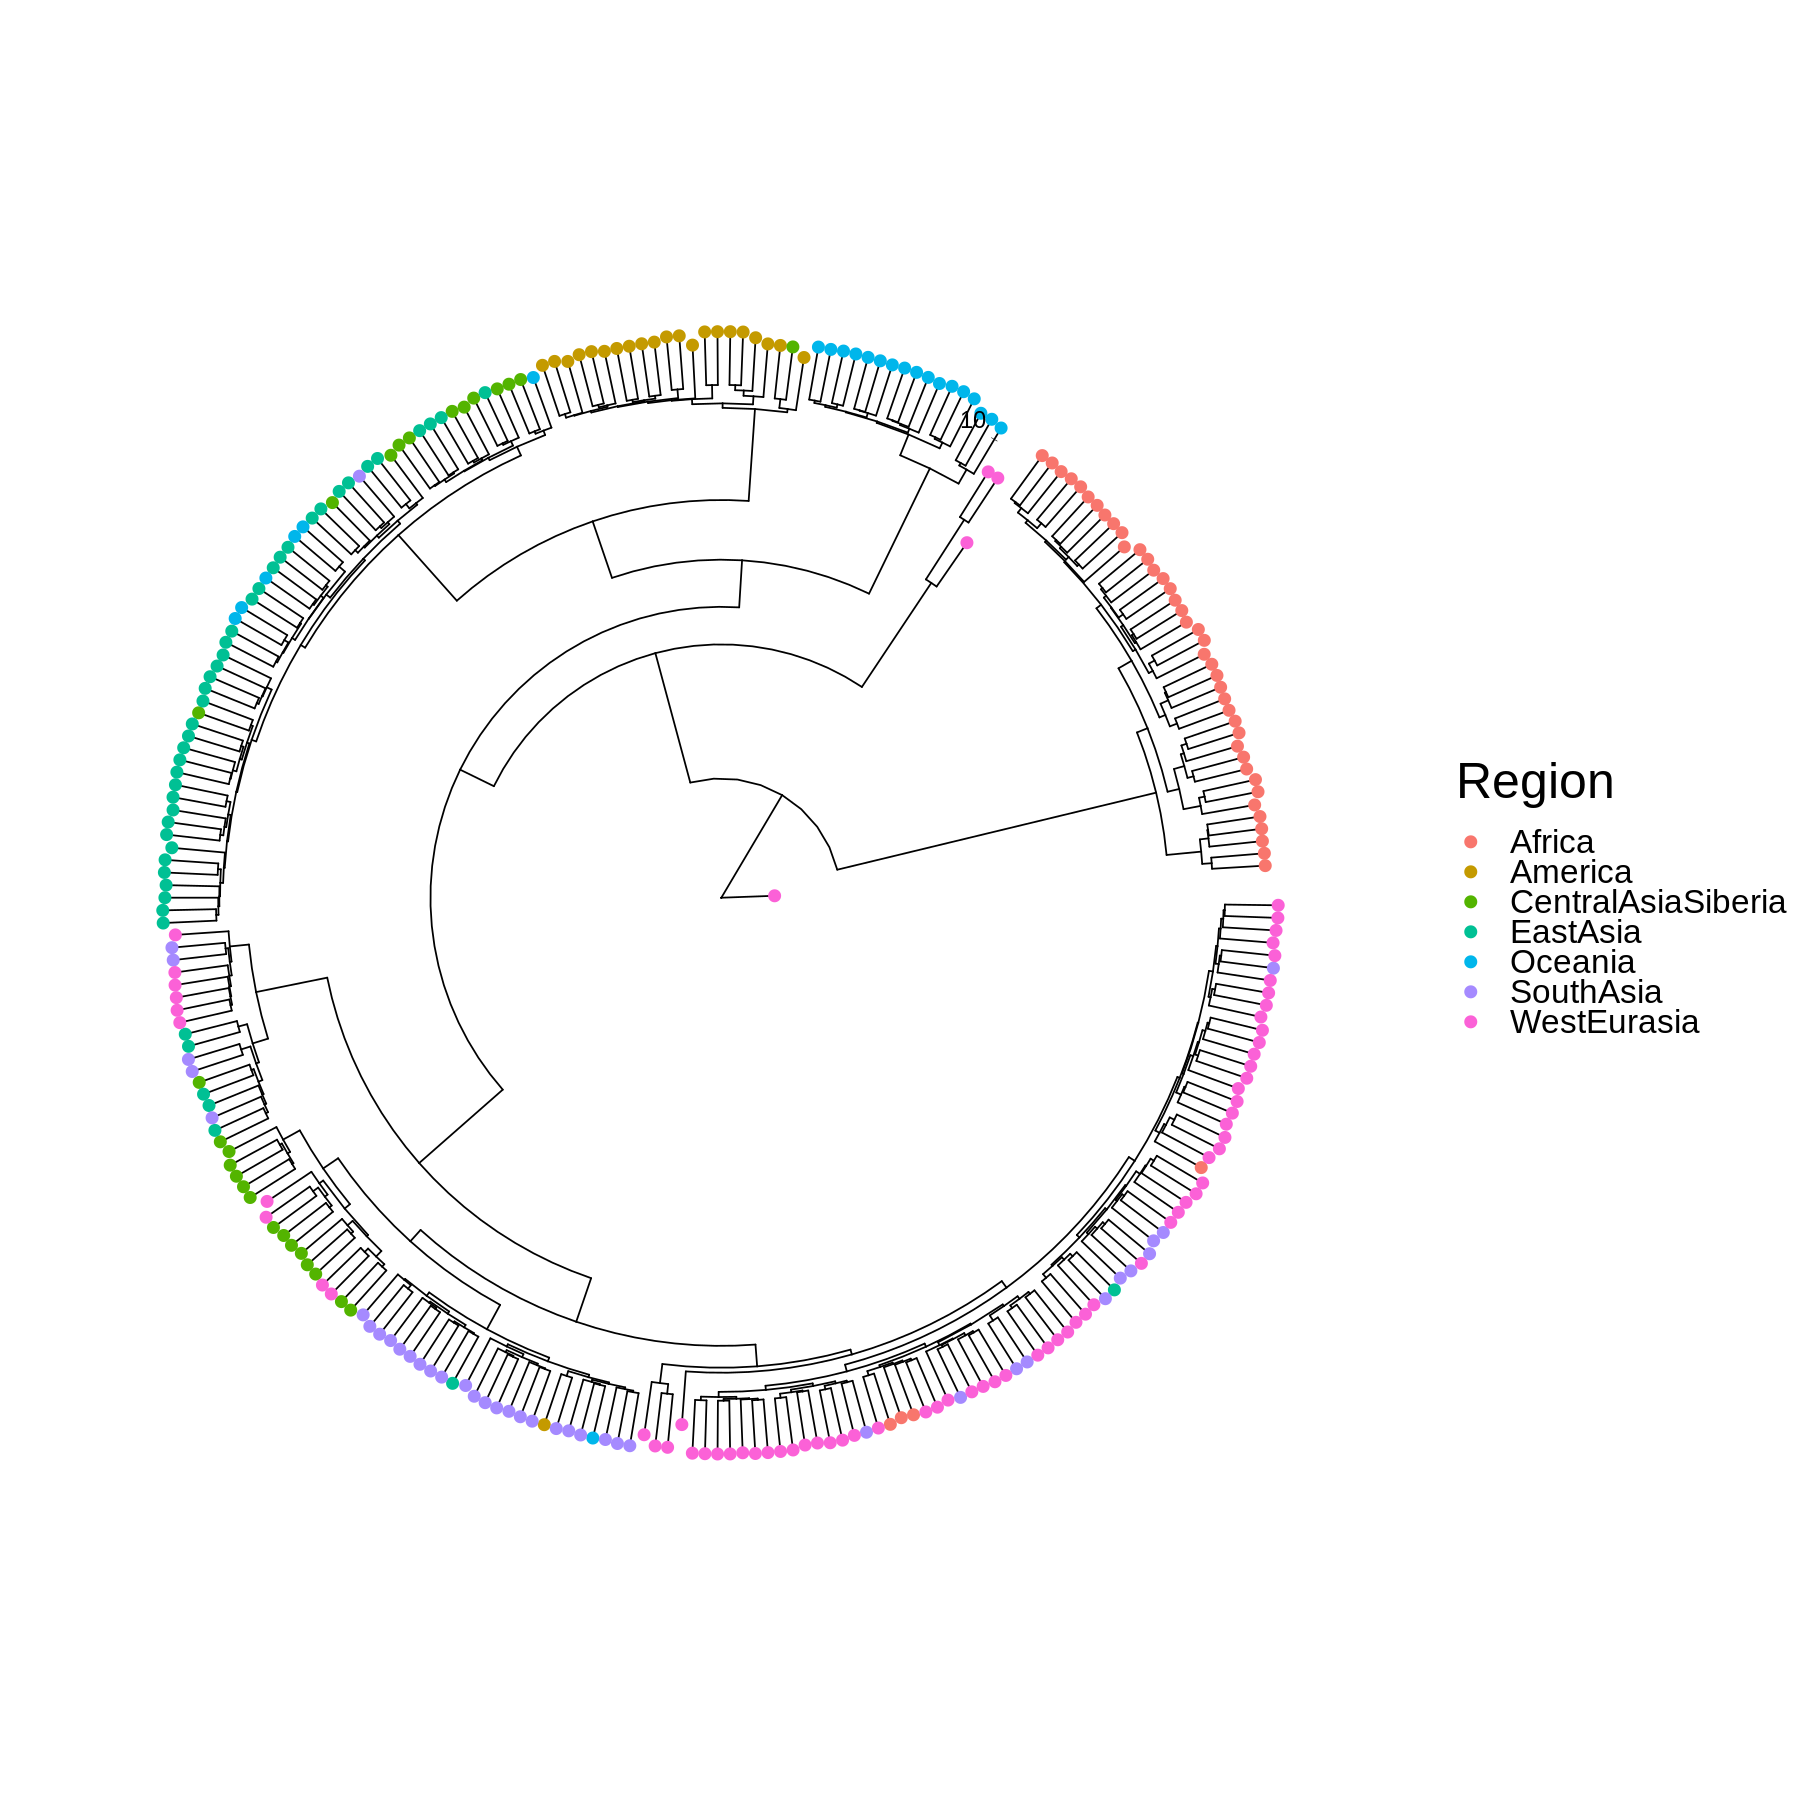

In [30]:
### Manhattan & Ward 
tre <- hclust(dist(df1, method="manhattan") , method= "ward.D")
options(repr.plot.width=15, repr.plot.height=15) ; par(oma=c(0,0,0,0))
p1 <- ggtree(tre, layout="circular") %<+% regions + #geom_tiplab() +
geom_tippoint(aes(color=Region), size=3) + # Colour code the tips with country\n",
# Adding in a scale
geom_treescale(x=0, y=45, fontsize=5, linesize=2, offset=2, width=10)+
theme(legend.title = element_text(size = 30), 
      legend.text = element_text(size = 20))


plot(p1)


Warning message in dist(df1, method = "manhattan"):
“NAs introduced by coercion”


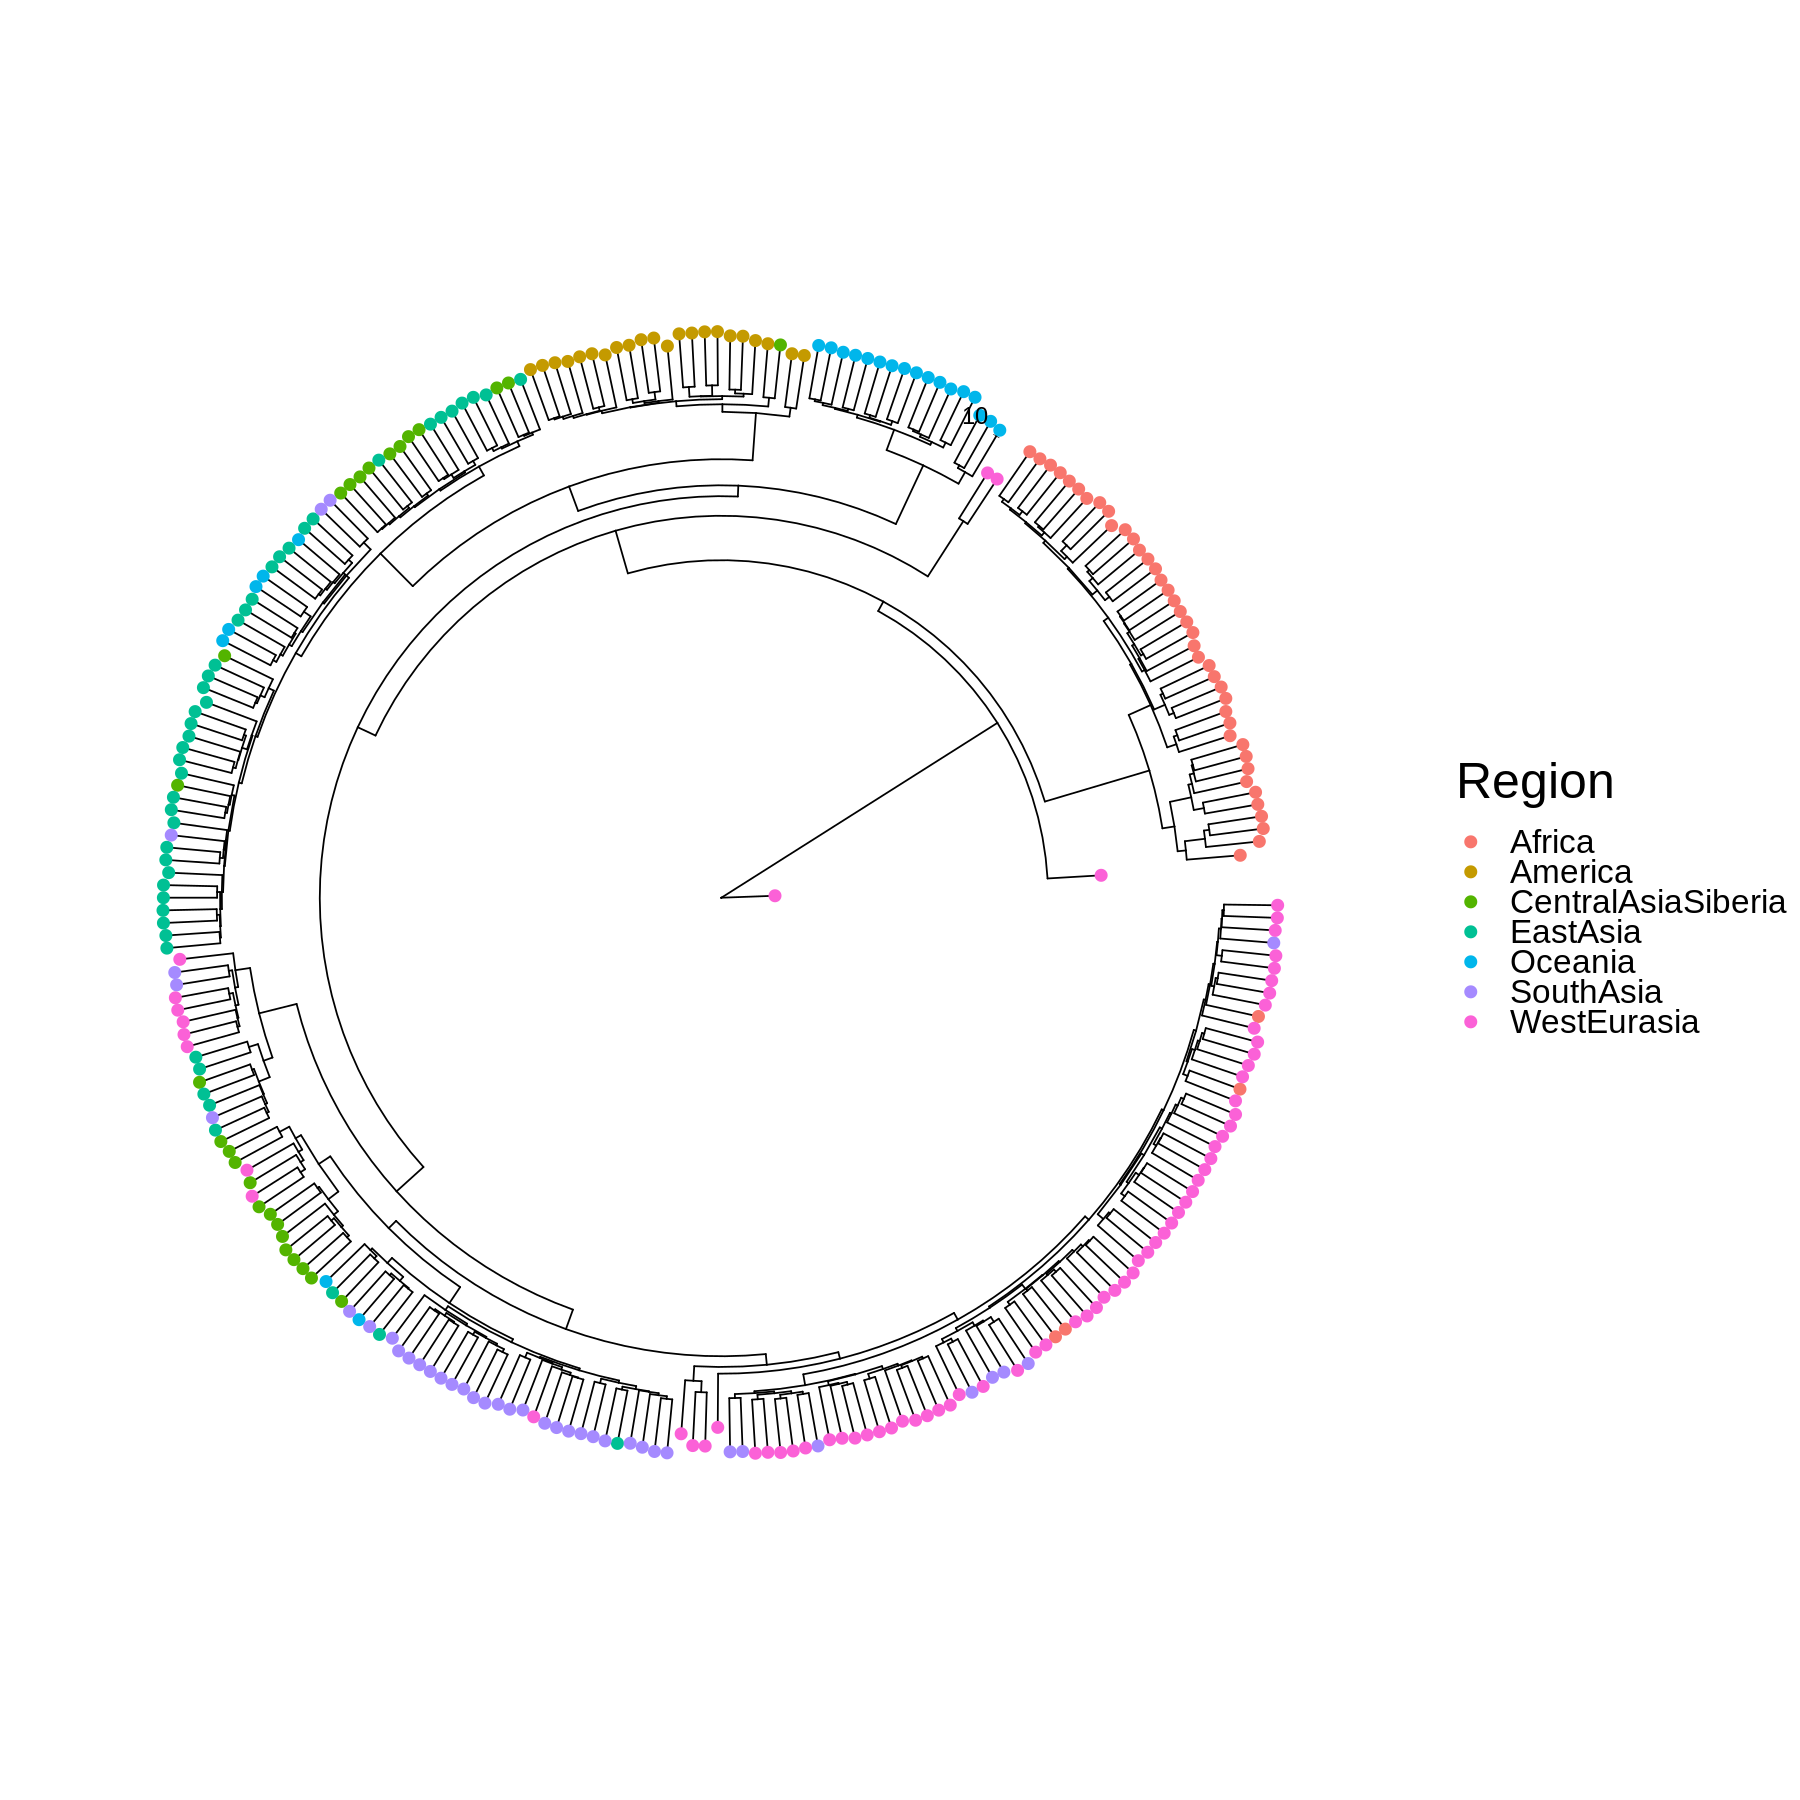

In [61]:
### Manhattan & ward2
tre <- hclust(dist(df1, method="manhattan") , method= "ward.D2")
options(repr.plot.width=15, repr.plot.height=15) ; par(oma=c(0,0,0,0))
p1 <- ggtree(tre, layout="circular") %<+% regions + #geom_tiplab() +
geom_tippoint(aes(color=Region), size=3) + # Colour code the tips with country\n",
# Adding in a scale
geom_treescale(x=0, y=45, fontsize=5, linesize=2, offset=2, width=10)+
theme(legend.title = element_text(size = 30), 
      legend.text = element_text(size = 20))


plot(p1)


Warning message in dist(df1, method = "manhattan"):
“NAs introduced by coercion”


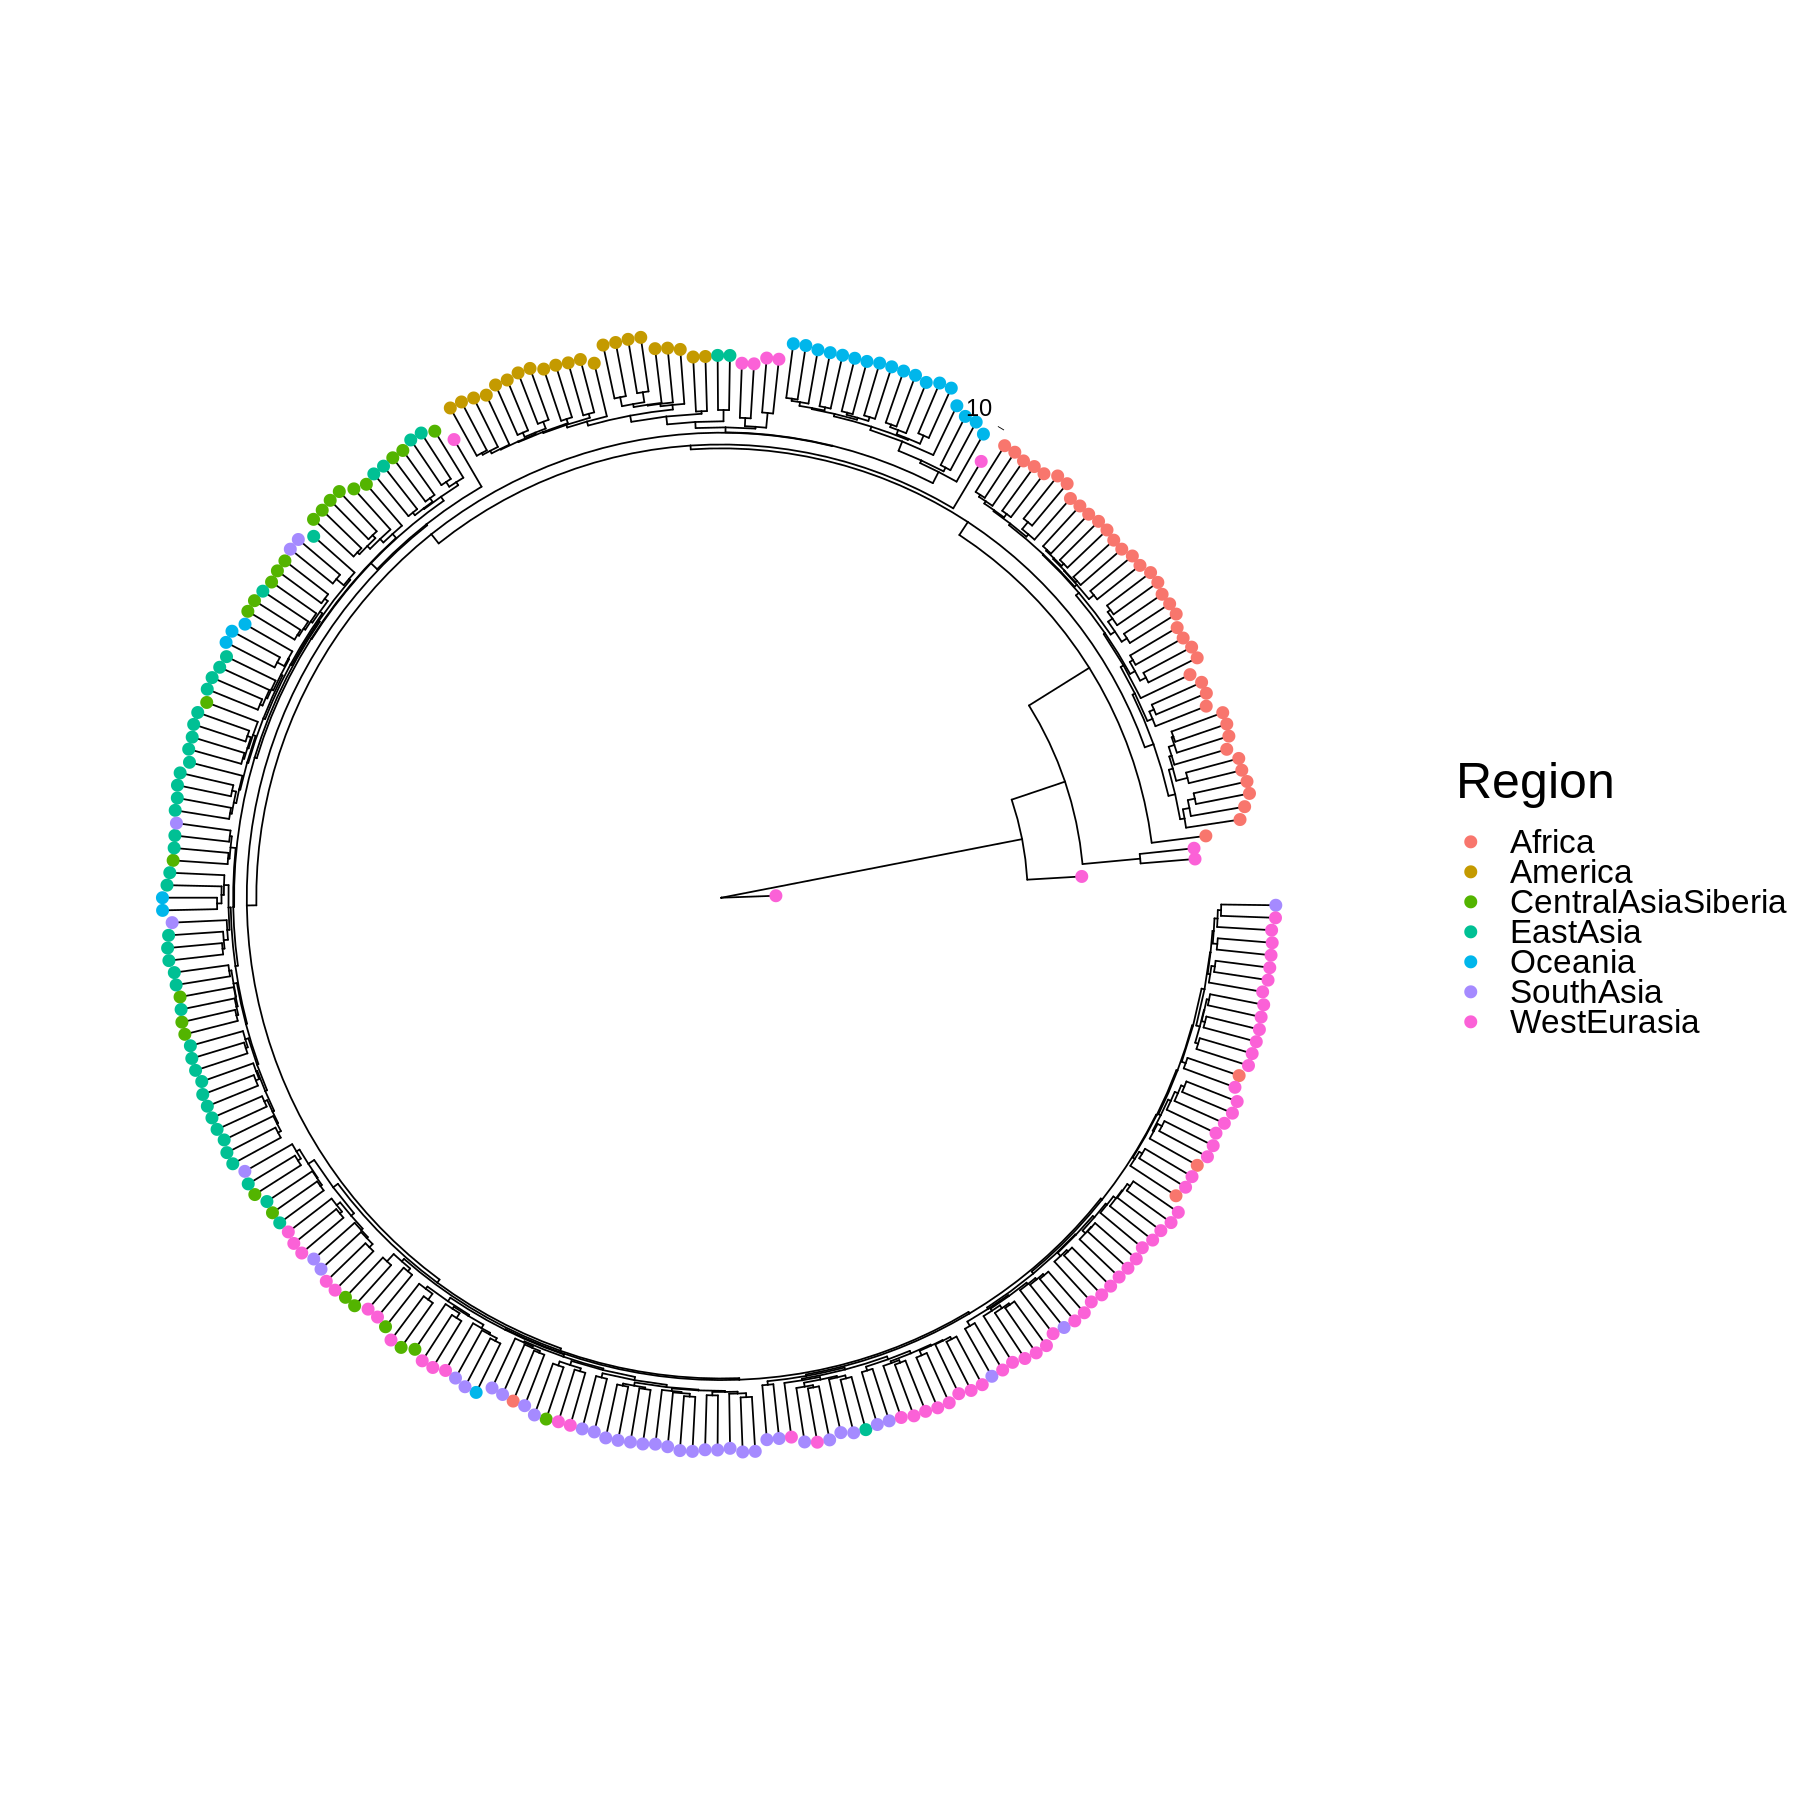

In [62]:
### Manhattan & complete
tre <- hclust(dist(df1, method="manhattan") , method= "complete")
options(repr.plot.width=15, repr.plot.height=15) ; par(oma=c(0,0,0,0))
p1 <- ggtree(tre, layout="circular") %<+% regions + #geom_tiplab() +
geom_tippoint(aes(color=Region), size=3) + # Colour code the tips with country\n",
# Adding in a scale
geom_treescale(x=0, y=45, fontsize=5, linesize=2, offset=2, width=10)+
theme(legend.title = element_text(size = 30), 
      legend.text = element_text(size = 20))


plot(p1)


Warning message in dist(df1, method = "euclidean"):
“NAs introduced by coercion”


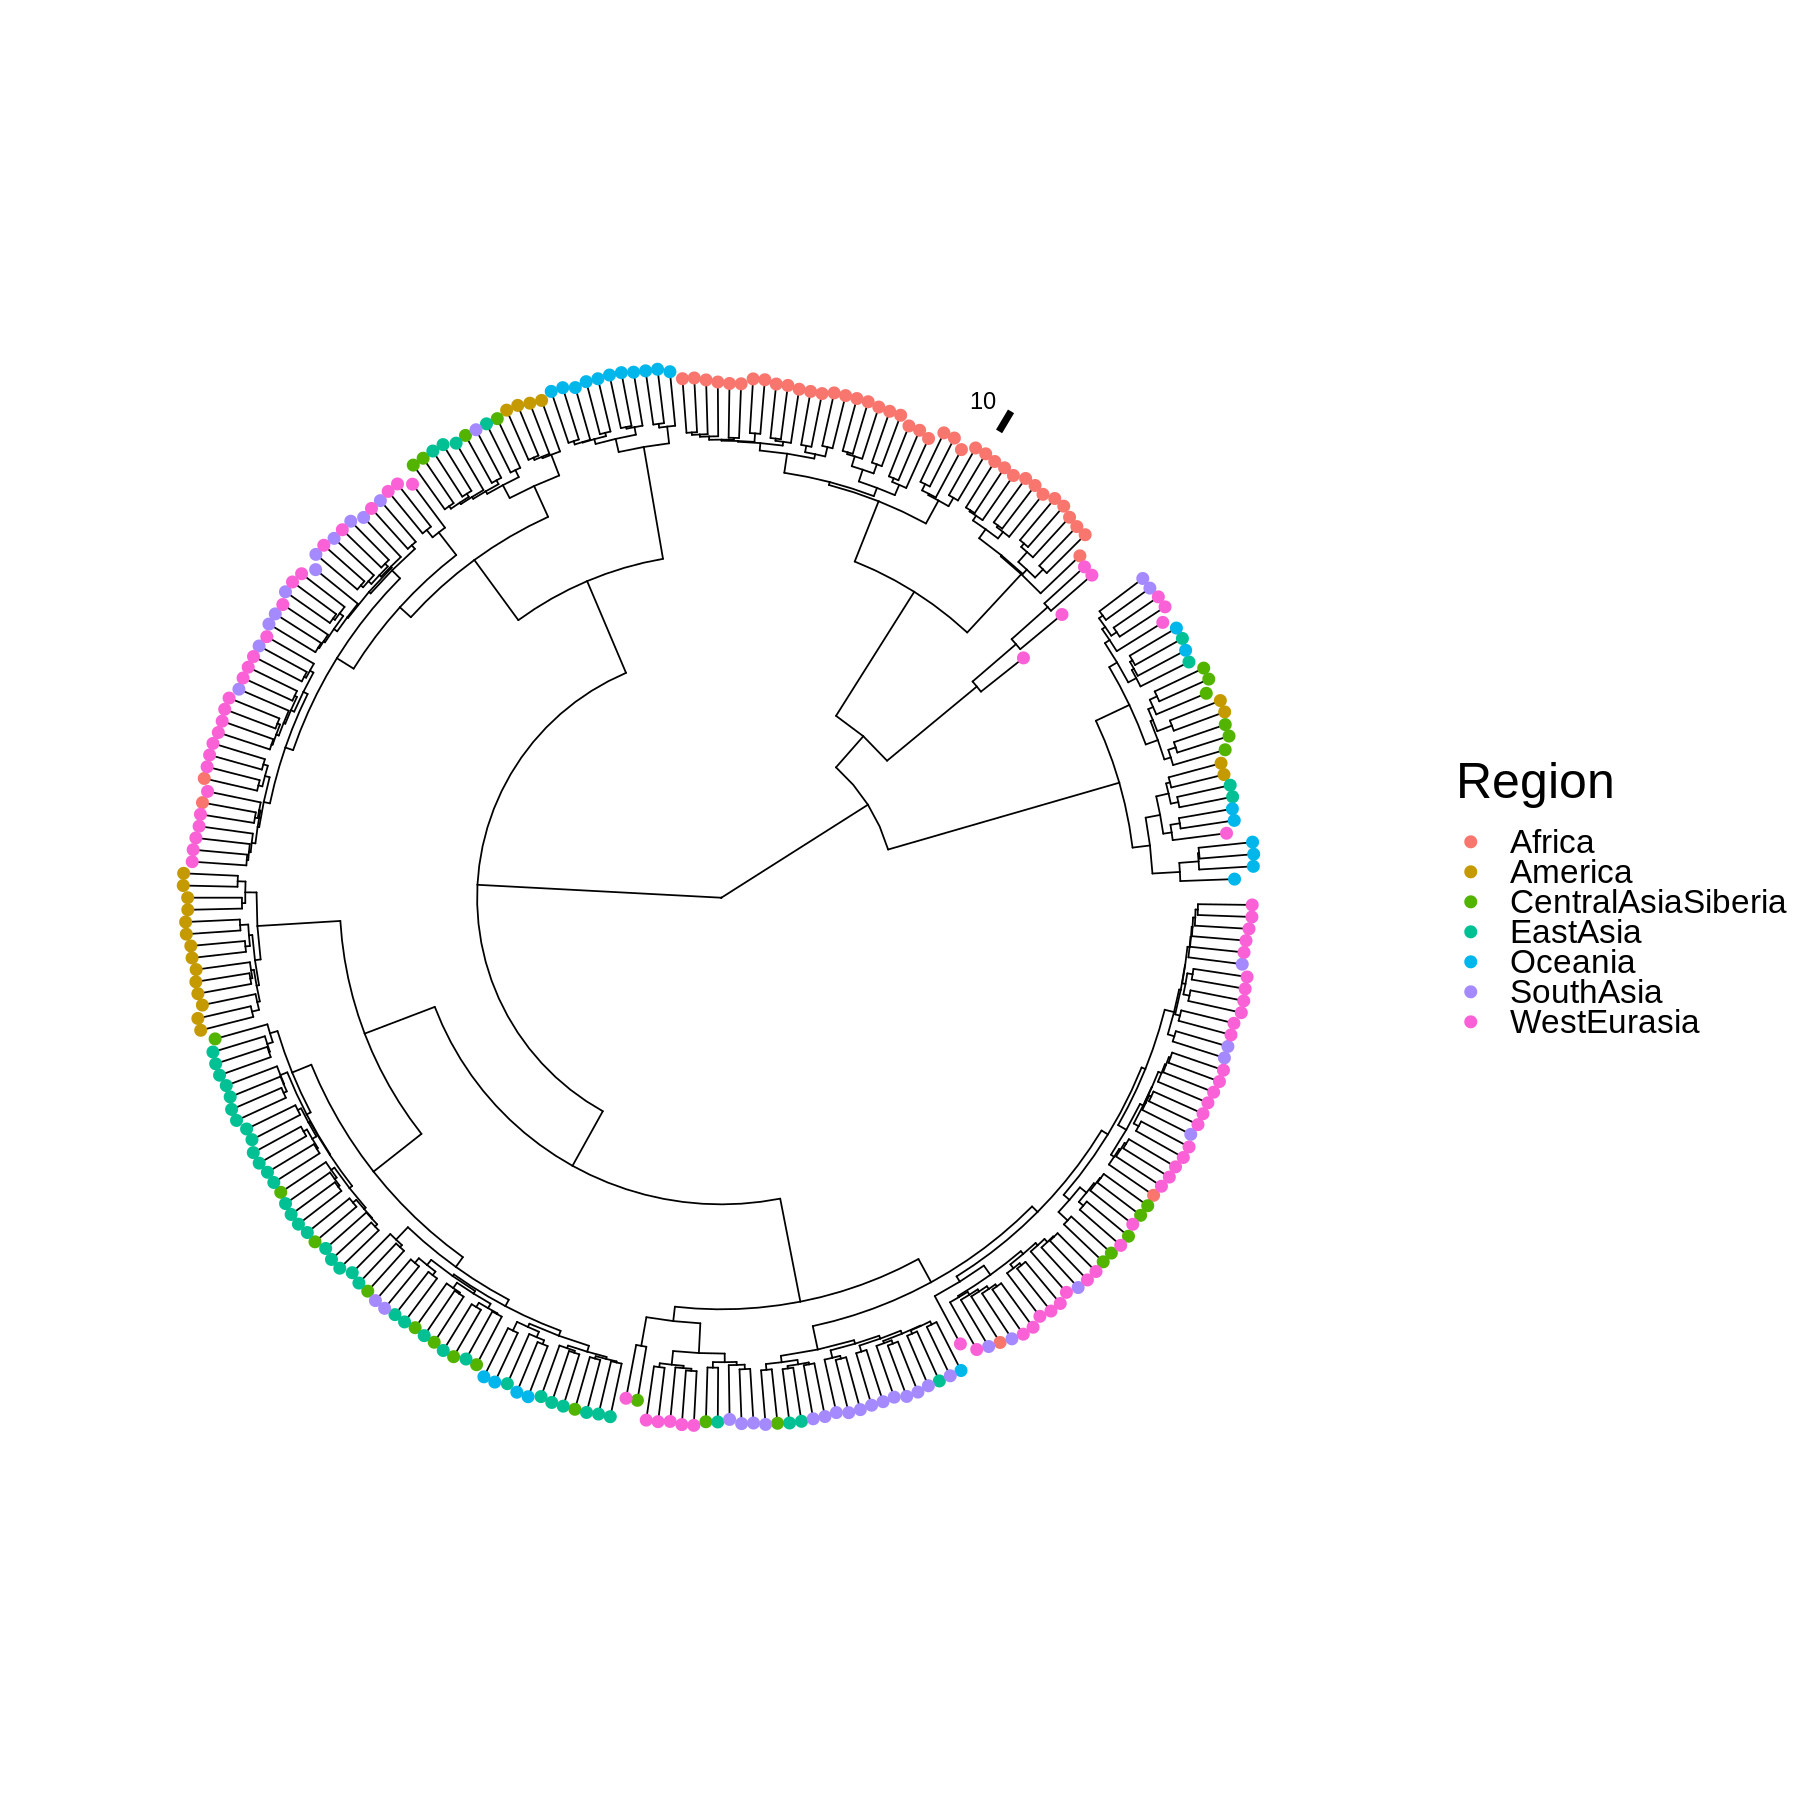

In [77]:
### Manhattan & average
tre <- hclust(dist(df1, method="euclidean") , method= "ward.D2")
options(repr.plot.width=15, repr.plot.height=15) ; par(oma=c(0,0,0,0))
p1 <- ggtree(tre, layout="circular") %<+% regions + #geom_tiplab() +
geom_tippoint(aes(color=Region), size=3) + # Colour code the tips with country\n",
# Adding in a scale
geom_treescale(x=0, y=45, fontsize=5, linesize=2, offset=2, width=10)+
theme(legend.title = element_text(size = 30), 
      legend.text = element_text(size = 20))


plot(p1)